# Project: Disney+ data analysis 

Disney+ is another one of the most popular media and video streaming platforms. They have close to 1300 movies or tv shows available on their platform, as of mid-2021, they have over 116M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Amazon Prime, along with details such as - cast, directors, ratings, release year, duration, etc.

![Disney Plus logo](disney-plus-logo-1143358.jpeg)

In this exploratory analysis, I have analyzed using the 'Disney+ Movies and TV shows' dataset and found some information about the TV shows that were aired on the platform for the past years. I have found out through questions and plot diagrams on how one data is correlating to the other, what the top 10 longest and shortest shows are etc.

## Downloading the Dataset (Disney+ Movies and TV Shows)

The dataset is available on kaggle on the following link: www.kaggle.com/datasets/shivamb/disney-movies-and-tv-shows
It contains one CSV file with 1450 unique values. We can download the dataset with the following steps: 

In [2]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [4]:
# Change this
dataset_url = 'https://www.kaggle.com/datasets/shivamb/disney-movies-and-tv-shows' 

In [5]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: farihazamannishat
Your Kaggle Key: ········


100%|██████████| 131k/131k [00:00<00:00, 54.9MB/s]

The dataset has been downloaded and extracted.

In [6]:
# Change this
data_dir = './disney-movies-and-tv-shows'

In [7]:
import os
os.listdir(data_dir)

['disney_plus_titles.csv']

Let us save and upload our work to Jovian before continuing.

In [8]:
project_name = "disney-plus-data-analysis-assignment" 

In [9]:
!pip install jovian --upgrade -q

In [10]:
import jovian

<IPython.core.display.Javascript object>

In [11]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "farihazaman-nishat/disney-plus-data-analysis-assignment" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/farihazaman-nishat/disney-plus-data-analysis-assignment


'https://jovian.com/farihazaman-nishat/disney-plus-data-analysis-assignment'

## Data Preparation and Cleaning



We need to filter out the data we don't need and use the data we need for this analysis from the dataset. The following steps have been followed to for cleaning and preparing the dataset for out exploratory analysis:

**Import the libraries:**

In [12]:
import pandas as pd
import numpy as np

**Importing data:**

In [13]:
filepath = './disney-movies-and-tv-shows/disney_plus_titles.csv'
disney = pd.read_csv(filepath)

In [14]:
disney

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
4,s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",NaN,"November 25, 2021",2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...
...,...,...,...,...,...,...,...,...,...,...,...,...
1445,s1446,Movie,X-Men Origins: Wolverine,Gavin Hood,"Hugh Jackman, Liev Schreiber, Danny Huston, wi...","United States, United Kingdom","June 4, 2021",2009,PG-13,108 min,"Action-Adventure, Family, Science Fiction",Wolverine unites with legendary X-Men to fight...
1446,s1447,Movie,Night at the Museum: Battle of the Smithsonian,Shawn Levy,"Ben Stiller, Amy Adams, Owen Wilson, Hank Azar...","United States, Canada","April 2, 2021",2009,PG,106 min,"Action-Adventure, Comedy, Family",Larry Daley returns to rescue some old friends...
1447,s1448,Movie,Eddie the Eagle,Dexter Fletcher,"Tom Costello, Jo Hartley, Keith Allen, Dickon ...","United Kingdom, Germany, United States","December 18, 2020",2016,PG-13,107 min,"Biographical, Comedy, Drama","True story of Eddie Edwards, a British ski-jum..."
1448,s1449,Movie,Bend It Like Beckham,Gurinder Chadha,"Parminder Nagra, Keira Knightley, Jonathan Rhy...","United Kingdom, Germany, United States","September 18, 2020",2003,PG-13,112 min,"Buddy, Comedy, Coming of Age",Despite the wishes of their traditional famili...


**Create a table specifically for Disney Series:**

In [15]:
tvshow = disney[disney['type'] == 'TV Show'].copy()

tvshow

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
4,s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",NaN,"November 25, 2021",2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...
6,s7,TV Show,Hawkeye,NaN,"Jeremy Renner, Hailee Steinfeld, Vera Farmiga,...",NaN,"November 24, 2021",2021,TV-14,1 Season,"Action-Adventure, Superhero",Clint Barton/Hawkeye must team up with skilled...
7,s8,TV Show,Port Protection Alaska,NaN,"Gary Muehlberger, Mary Miller, Curly Leach, Sa...",United States,"November 24, 2021",2015,TV-14,2 Seasons,"Docuseries, Reality, Survival",Residents of Port Protection must combat volat...
8,s9,TV Show,Secrets of the Zoo: Tampa,NaN,"Dr. Ray Ball, Dr. Lauren Smith, Chris Massaro,...",United States,"November 24, 2021",2019,TV-PG,2 Seasons,"Animals & Nature, Docuseries, Family",A day in the life at ZooTampa is anything but ...
13,s14,TV Show,"Dr. Oakley, Yukon Vet",NaN,"Dr. Michelle Oakley, Zachary Fine",United States,"November 17, 2021",2013,TV-PG,10 Seasons,"Action-Adventure, Animals & Nature, Docuseries","Meet Dr. Michelle Oakley, vet to pretty much e..."
...,...,...,...,...,...,...,...,...,...,...,...,...
1417,s1418,TV Show,X-Men: Evolution,NaN,"Noel Fisher, Vincent Gale, Christopher Judge, ...",United States,"November 12, 2019",2000,TV-Y7,4 Seasons,"Action-Adventure, Animation, Kids",X-Men: Evolution features the team as teenager...
1434,s1435,TV Show,Smart Guy,NaN,"Tahj Mowry, John Jones, Jason Weaver, Essence ...",United States,"October 1, 2019",1996,TV-G,3 Seasons,"Comedy, Coming of Age, Kids",A genius tries to fit in as a high school soph...
1439,s1440,TV Show,Disney Kirby Buckets,NaN,"Jacob Bertrand, Mekai Curtis, Cade Sutton, Oli...",United States,NaN,2014,TV-Y7,3 Seasons,"Action-Adventure, Comedy, Coming of Age",Welcome to Kirby's world! It's rude and sketchy.
1440,s1441,TV Show,Disney Mech-X4,NaN,"Nathaniel Potvin, Raymond Cham, Kamran Lucas, ...",Canada,NaN,2016,TV-Y7,2 Seasons,"Action-Adventure, Comedy, Science Fiction",Ryan discovers his ability to control a giant ...


**drop any series with a release year before 2000**

In [16]:
tvshow.drop(tvshow[tvshow['release_year'] < 2000].index, inplace = True)

tvshow

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
4,s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",NaN,"November 25, 2021",2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...
6,s7,TV Show,Hawkeye,NaN,"Jeremy Renner, Hailee Steinfeld, Vera Farmiga,...",NaN,"November 24, 2021",2021,TV-14,1 Season,"Action-Adventure, Superhero",Clint Barton/Hawkeye must team up with skilled...
7,s8,TV Show,Port Protection Alaska,NaN,"Gary Muehlberger, Mary Miller, Curly Leach, Sa...",United States,"November 24, 2021",2015,TV-14,2 Seasons,"Docuseries, Reality, Survival",Residents of Port Protection must combat volat...
8,s9,TV Show,Secrets of the Zoo: Tampa,NaN,"Dr. Ray Ball, Dr. Lauren Smith, Chris Massaro,...",United States,"November 24, 2021",2019,TV-PG,2 Seasons,"Animals & Nature, Docuseries, Family",A day in the life at ZooTampa is anything but ...
13,s14,TV Show,"Dr. Oakley, Yukon Vet",NaN,"Dr. Michelle Oakley, Zachary Fine",United States,"November 17, 2021",2013,TV-PG,10 Seasons,"Action-Adventure, Animals & Nature, Docuseries","Meet Dr. Michelle Oakley, vet to pretty much e..."
...,...,...,...,...,...,...,...,...,...,...,...,...
1414,s1415,TV Show,Wolverine and The X-Men,NaN,"Steve Blum, Chris Edgerly, Jennifer Hale, Mich...",United States,"November 12, 2019",2008,TV-Y7,1 Season,"Action-Adventure, Animation, Kids",Wolverine and the X-Men must join together to ...
1417,s1418,TV Show,X-Men: Evolution,NaN,"Noel Fisher, Vincent Gale, Christopher Judge, ...",United States,"November 12, 2019",2000,TV-Y7,4 Seasons,"Action-Adventure, Animation, Kids",X-Men: Evolution features the team as teenager...
1439,s1440,TV Show,Disney Kirby Buckets,NaN,"Jacob Bertrand, Mekai Curtis, Cade Sutton, Oli...",United States,NaN,2014,TV-Y7,3 Seasons,"Action-Adventure, Comedy, Coming of Age",Welcome to Kirby's world! It's rude and sketchy.
1440,s1441,TV Show,Disney Mech-X4,NaN,"Nathaniel Potvin, Raymond Cham, Kamran Lucas, ...",Canada,NaN,2016,TV-Y7,2 Seasons,"Action-Adventure, Comedy, Science Fiction",Ryan discovers his ability to control a giant ...


**Drop unnecessary columns:**

In [17]:
cols_to_drop = ['director','date_added']
tvshow.drop(cols_to_drop, axis='columns', inplace=True)
tvshow

,show_id,type,title,cast,country,release_year,rating,duration,listed_in,description
4,s5,TV Show,The Beatles: Get Back,"John Lennon, Paul McCartney, George Harrison, ...",NaN,2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...
6,s7,TV Show,Hawkeye,"Jeremy Renner, Hailee Steinfeld, Vera Farmiga,...",NaN,2021,TV-14,1 Season,"Action-Adventure, Superhero",Clint Barton/Hawkeye must team up with skilled...
7,s8,TV Show,Port Protection Alaska,"Gary Muehlberger, Mary Miller, Curly Leach, Sa...",United States,2015,TV-14,2 Seasons,"Docuseries, Reality, Survival",Residents of Port Protection must combat volat...
8,s9,TV Show,Secrets of the Zoo: Tampa,"Dr. Ray Ball, Dr. Lauren Smith, Chris Massaro,...",United States,2019,TV-PG,2 Seasons,"Animals & Nature, Docuseries, Family",A day in the life at ZooTampa is anything but ...
13,s14,TV Show,"Dr. Oakley, Yukon Vet","Dr. Michelle Oakley, Zachary Fine",United States,2013,TV-PG,10 Seasons,"Action-Adventure, Animals & Nature, Docuseries","Meet Dr. Michelle Oakley, vet to pretty much e..."
...,...,...,...,...,...,...,...,...,...,...
1414,s1415,TV Show,Wolverine and The X-Men,"Steve Blum, Chris Edgerly, Jennifer Hale, Mich...",United States,2008,TV-Y7,1 Season,"Action-Adventure, Animation, Kids",Wolverine and the X-Men must join together to ...
1417,s1418,TV Show,X-Men: Evolution,"Noel Fisher, Vincent Gale, Christopher Judge, ...",United States,2000,TV-Y7,4 Seasons,"Action-Adventure, Animation, Kids",X-Men: Evolution features the team as teenager...
1439,s1440,TV Show,Disney Kirby Buckets,"Jacob Bertrand, Mekai Curtis, Cade Sutton, Oli...",United States,2014,TV-Y7,3 Seasons,"Action-Adventure, Comedy, Coming of Age",Welcome to Kirby's world! It's rude and sketchy.
1440,s1441,TV Show,Disney Mech-X4,"Nathaniel Potvin, Raymond Cham, Kamran Lucas, ...",Canada,2016,TV-Y7,2 Seasons,"Action-Adventure, Comedy, Science Fiction",Ryan discovers his ability to control a giant ...


**drop the NA fields of the rating column:**

In [18]:
tvshow['rating'].dropna(inplace=True)
tvshow

,show_id,type,title,cast,country,release_year,rating,duration,listed_in,description
4,s5,TV Show,The Beatles: Get Back,"John Lennon, Paul McCartney, George Harrison, ...",NaN,2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...
6,s7,TV Show,Hawkeye,"Jeremy Renner, Hailee Steinfeld, Vera Farmiga,...",NaN,2021,TV-14,1 Season,"Action-Adventure, Superhero",Clint Barton/Hawkeye must team up with skilled...
7,s8,TV Show,Port Protection Alaska,"Gary Muehlberger, Mary Miller, Curly Leach, Sa...",United States,2015,TV-14,2 Seasons,"Docuseries, Reality, Survival",Residents of Port Protection must combat volat...
8,s9,TV Show,Secrets of the Zoo: Tampa,"Dr. Ray Ball, Dr. Lauren Smith, Chris Massaro,...",United States,2019,TV-PG,2 Seasons,"Animals & Nature, Docuseries, Family",A day in the life at ZooTampa is anything but ...
13,s14,TV Show,"Dr. Oakley, Yukon Vet","Dr. Michelle Oakley, Zachary Fine",United States,2013,TV-PG,10 Seasons,"Action-Adventure, Animals & Nature, Docuseries","Meet Dr. Michelle Oakley, vet to pretty much e..."
...,...,...,...,...,...,...,...,...,...,...
1414,s1415,TV Show,Wolverine and The X-Men,"Steve Blum, Chris Edgerly, Jennifer Hale, Mich...",United States,2008,TV-Y7,1 Season,"Action-Adventure, Animation, Kids",Wolverine and the X-Men must join together to ...
1417,s1418,TV Show,X-Men: Evolution,"Noel Fisher, Vincent Gale, Christopher Judge, ...",United States,2000,TV-Y7,4 Seasons,"Action-Adventure, Animation, Kids",X-Men: Evolution features the team as teenager...
1439,s1440,TV Show,Disney Kirby Buckets,"Jacob Bertrand, Mekai Curtis, Cade Sutton, Oli...",United States,2014,TV-Y7,3 Seasons,"Action-Adventure, Comedy, Coming of Age",Welcome to Kirby's world! It's rude and sketchy.
1440,s1441,TV Show,Disney Mech-X4,"Nathaniel Potvin, Raymond Cham, Kamran Lucas, ...",Canada,2016,TV-Y7,2 Seasons,"Action-Adventure, Comedy, Science Fiction",Ryan discovers his ability to control a giant ...


**Extract the integers from the duration column as they are all in seasons, not minutes format:**

In [19]:
tvshow['duration'] = tvshow['duration'].str.extract('(\d+)', expand=False).astype(int)
tvshow

,show_id,type,title,cast,country,release_year,rating,duration,listed_in,description
4,s5,TV Show,The Beatles: Get Back,"John Lennon, Paul McCartney, George Harrison, ...",NaN,2021,NaN,1,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...
6,s7,TV Show,Hawkeye,"Jeremy Renner, Hailee Steinfeld, Vera Farmiga,...",NaN,2021,TV-14,1,"Action-Adventure, Superhero",Clint Barton/Hawkeye must team up with skilled...
7,s8,TV Show,Port Protection Alaska,"Gary Muehlberger, Mary Miller, Curly Leach, Sa...",United States,2015,TV-14,2,"Docuseries, Reality, Survival",Residents of Port Protection must combat volat...
8,s9,TV Show,Secrets of the Zoo: Tampa,"Dr. Ray Ball, Dr. Lauren Smith, Chris Massaro,...",United States,2019,TV-PG,2,"Animals & Nature, Docuseries, Family",A day in the life at ZooTampa is anything but ...
13,s14,TV Show,"Dr. Oakley, Yukon Vet","Dr. Michelle Oakley, Zachary Fine",United States,2013,TV-PG,10,"Action-Adventure, Animals & Nature, Docuseries","Meet Dr. Michelle Oakley, vet to pretty much e..."
...,...,...,...,...,...,...,...,...,...,...
1414,s1415,TV Show,Wolverine and The X-Men,"Steve Blum, Chris Edgerly, Jennifer Hale, Mich...",United States,2008,TV-Y7,1,"Action-Adventure, Animation, Kids",Wolverine and the X-Men must join together to ...
1417,s1418,TV Show,X-Men: Evolution,"Noel Fisher, Vincent Gale, Christopher Judge, ...",United States,2000,TV-Y7,4,"Action-Adventure, Animation, Kids",X-Men: Evolution features the team as teenager...
1439,s1440,TV Show,Disney Kirby Buckets,"Jacob Bertrand, Mekai Curtis, Cade Sutton, Oli...",United States,2014,TV-Y7,3,"Action-Adventure, Comedy, Coming of Age",Welcome to Kirby's world! It's rude and sketchy.
1440,s1441,TV Show,Disney Mech-X4,"Nathaniel Potvin, Raymond Cham, Kamran Lucas, ...",Canada,2016,TV-Y7,2,"Action-Adventure, Comedy, Science Fiction",Ryan discovers his ability to control a giant ...


**Turn the seasons into minutes for the duration column and create a new column called duration_min:**

In [20]:
tvshow['duration_min'] = tvshow['duration'] * 10 * 60 * 30  # Assuming 10 episodes per season and 30 minutes per episode
tvshow

,show_id,type,title,cast,country,release_year,rating,duration,listed_in,description,duration_min
4,s5,TV Show,The Beatles: Get Back,"John Lennon, Paul McCartney, George Harrison, ...",NaN,2021,NaN,1,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...,18000
6,s7,TV Show,Hawkeye,"Jeremy Renner, Hailee Steinfeld, Vera Farmiga,...",NaN,2021,TV-14,1,"Action-Adventure, Superhero",Clint Barton/Hawkeye must team up with skilled...,18000
7,s8,TV Show,Port Protection Alaska,"Gary Muehlberger, Mary Miller, Curly Leach, Sa...",United States,2015,TV-14,2,"Docuseries, Reality, Survival",Residents of Port Protection must combat volat...,36000
8,s9,TV Show,Secrets of the Zoo: Tampa,"Dr. Ray Ball, Dr. Lauren Smith, Chris Massaro,...",United States,2019,TV-PG,2,"Animals & Nature, Docuseries, Family",A day in the life at ZooTampa is anything but ...,36000
13,s14,TV Show,"Dr. Oakley, Yukon Vet","Dr. Michelle Oakley, Zachary Fine",United States,2013,TV-PG,10,"Action-Adventure, Animals & Nature, Docuseries","Meet Dr. Michelle Oakley, vet to pretty much e...",180000
...,...,...,...,...,...,...,...,...,...,...,...
1414,s1415,TV Show,Wolverine and The X-Men,"Steve Blum, Chris Edgerly, Jennifer Hale, Mich...",United States,2008,TV-Y7,1,"Action-Adventure, Animation, Kids",Wolverine and the X-Men must join together to ...,18000
1417,s1418,TV Show,X-Men: Evolution,"Noel Fisher, Vincent Gale, Christopher Judge, ...",United States,2000,TV-Y7,4,"Action-Adventure, Animation, Kids",X-Men: Evolution features the team as teenager...,72000
1439,s1440,TV Show,Disney Kirby Buckets,"Jacob Bertrand, Mekai Curtis, Cade Sutton, Oli...",United States,2014,TV-Y7,3,"Action-Adventure, Comedy, Coming of Age",Welcome to Kirby's world! It's rude and sketchy.,54000
1440,s1441,TV Show,Disney Mech-X4,"Nathaniel Potvin, Raymond Cham, Kamran Lucas, ...",Canada,2016,TV-Y7,2,"Action-Adventure, Comedy, Science Fiction",Ryan discovers his ability to control a giant ...,36000


**display all the rows and columns of the new dataFrame we created:**

In [21]:
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')
tvshow

,show_id,type,title,cast,country,release_year,rating,duration,listed_in,description,duration_min
4,s5,TV Show,The Beatles: Get Back,"John Lennon, Paul McCartney, George Harrison, ...",NaN,2021,NaN,1,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...,18000
6,s7,TV Show,Hawkeye,"Jeremy Renner, Hailee Steinfeld, Vera Farmiga,...",NaN,2021,TV-14,1,"Action-Adventure, Superhero",Clint Barton/Hawkeye must team up with skilled...,18000
7,s8,TV Show,Port Protection Alaska,"Gary Muehlberger, Mary Miller, Curly Leach, Sa...",United States,2015,TV-14,2,"Docuseries, Reality, Survival",Residents of Port Protection must combat volat...,36000
8,s9,TV Show,Secrets of the Zoo: Tampa,"Dr. Ray Ball, Dr. Lauren Smith, Chris Massaro,...",United States,2019,TV-PG,2,"Animals & Nature, Docuseries, Family",A day in the life at ZooTampa is anything but ...,36000
13,s14,TV Show,"Dr. Oakley, Yukon Vet","Dr. Michelle Oakley, Zachary Fine",United States,2013,TV-PG,10,"Action-Adventure, Animals & Nature, Docuseries","Meet Dr. Michelle Oakley, vet to pretty much e...",180000
...,...,...,...,...,...,...,...,...,...,...,...
1414,s1415,TV Show,Wolverine and The X-Men,"Steve Blum, Chris Edgerly, Jennifer Hale, Mich...",United States,2008,TV-Y7,1,"Action-Adventure, Animation, Kids",Wolverine and the X-Men must join together to ...,18000
1417,s1418,TV Show,X-Men: Evolution,"Noel Fisher, Vincent Gale, Christopher Judge, ...",United States,2000,TV-Y7,4,"Action-Adventure, Animation, Kids",X-Men: Evolution features the team as teenager...,72000
1439,s1440,TV Show,Disney Kirby Buckets,"Jacob Bertrand, Mekai Curtis, Cade Sutton, Oli...",United States,2014,TV-Y7,3,"Action-Adventure, Comedy, Coming of Age",Welcome to Kirby's world! It's rude and sketchy.,54000
1440,s1441,TV Show,Disney Mech-X4,"Nathaniel Potvin, Raymond Cham, Kamran Lucas, ...",Canada,2016,TV-Y7,2,"Action-Adventure, Comedy, Science Fiction",Ryan discovers his ability to control a giant ...,36000


**Drop the duration column which we don't need anymore:**

In [22]:
tvshow.drop('duration', axis='columns', inplace=True)
tvshow

,show_id,type,title,cast,country,release_year,rating,listed_in,description,duration_min
4,s5,TV Show,The Beatles: Get Back,"John Lennon, Paul McCartney, George Harrison, ...",NaN,2021,NaN,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...,18000
6,s7,TV Show,Hawkeye,"Jeremy Renner, Hailee Steinfeld, Vera Farmiga,...",NaN,2021,TV-14,"Action-Adventure, Superhero",Clint Barton/Hawkeye must team up with skilled...,18000
7,s8,TV Show,Port Protection Alaska,"Gary Muehlberger, Mary Miller, Curly Leach, Sa...",United States,2015,TV-14,"Docuseries, Reality, Survival",Residents of Port Protection must combat volat...,36000
8,s9,TV Show,Secrets of the Zoo: Tampa,"Dr. Ray Ball, Dr. Lauren Smith, Chris Massaro,...",United States,2019,TV-PG,"Animals & Nature, Docuseries, Family",A day in the life at ZooTampa is anything but ...,36000
13,s14,TV Show,"Dr. Oakley, Yukon Vet","Dr. Michelle Oakley, Zachary Fine",United States,2013,TV-PG,"Action-Adventure, Animals & Nature, Docuseries","Meet Dr. Michelle Oakley, vet to pretty much e...",180000
...,...,...,...,...,...,...,...,...,...,...
1414,s1415,TV Show,Wolverine and The X-Men,"Steve Blum, Chris Edgerly, Jennifer Hale, Mich...",United States,2008,TV-Y7,"Action-Adventure, Animation, Kids",Wolverine and the X-Men must join together to ...,18000
1417,s1418,TV Show,X-Men: Evolution,"Noel Fisher, Vincent Gale, Christopher Judge, ...",United States,2000,TV-Y7,"Action-Adventure, Animation, Kids",X-Men: Evolution features the team as teenager...,72000
1439,s1440,TV Show,Disney Kirby Buckets,"Jacob Bertrand, Mekai Curtis, Cade Sutton, Oli...",United States,2014,TV-Y7,"Action-Adventure, Comedy, Coming of Age",Welcome to Kirby's world! It's rude and sketchy.,54000
1440,s1441,TV Show,Disney Mech-X4,"Nathaniel Potvin, Raymond Cham, Kamran Lucas, ...",Canada,2016,TV-Y7,"Action-Adventure, Comedy, Science Fiction",Ryan discovers his ability to control a giant ...,36000


In [23]:
import jovian

In [24]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "farihazaman-nishat/disney-plus-data-analysis-assignment" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/farihazaman-nishat/disney-plus-data-analysis-assignment


'https://jovian.com/farihazaman-nishat/disney-plus-data-analysis-assignment'

## Exploratory Analysis and Visualization



**Importing the libraries:**

In [25]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

**Computing the mean, sum, range and other interesting statistics for numeric columns:**

In [27]:
tvshow.describe()

,release_year,duration_min
count,356.000000,356.000000
mean,2016.016854,35494.382022
std,4.719125,33610.066767
min,2000.000000,18000.000000
25%,2014.000000,18000.000000
50%,2017.000000,18000.000000
75%,2020.000000,36000.000000
max,2021.000000,342000.000000


In [28]:
mean_duration = tvshow['duration_min'].mean()
sum_duration = tvshow['duration_min'].sum()

print("Mean duration:", mean_duration)
print("Sum of duration:", sum_duration)

Mean duration: 35494.38202247191
Sum of duration: 12636000


In [29]:
range_duration = tvshow['duration_min'].max() - tvshow['duration_min'].min()

print("Range of duration(minutes):", range_duration)

Range of duration(minutes): 324000


**Exaplanation:** Here, we found out the mean,sum and range of the only integer value column here which is - 'duration_min'. From here, we can see the mean,sum and range of the duration of the tv shows aired after 2000 in Disney+.

**Distribution of release years for TV shows:**

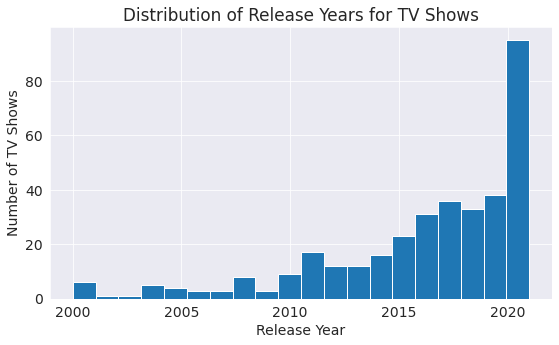

In [30]:
tvshow_tv = tvshow[tvshow['type'] == 'TV Show'][['release_year']]

# Create a histogram of the release years with 20 bins
tvshow_tv.hist(bins=20)

# Add axis labels and title
plt.xlabel('Release Year')
plt.ylabel('Number of TV Shows')
plt.title('Distribution of Release Years for TV Shows')
plt.show()

**Exaplanation:** Here, we found out the distribution of release years of tv shows in Disney+ from 2000-2020. From here, we can see the year where the *highest number of shows* were released on the year **2020** and almost no shows were released on the years **2001-2002**.

**Average runtime of the TV shows between the years 2000 to 2023** (sorted by rating) **:**

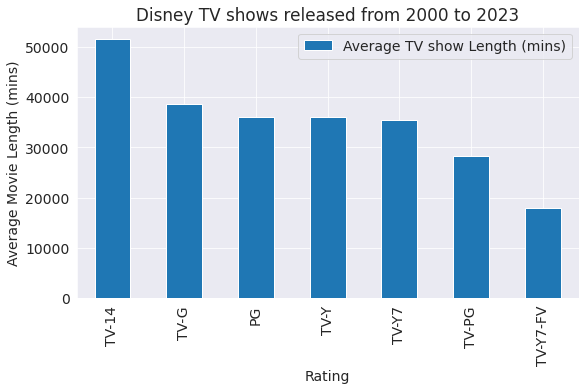

In [31]:
avg_tvshow_length_by_rating = tvshow[['rating','duration_min']] \
                                .groupby('rating') \
                                .mean() \
                                .sort_values(by='duration_min', ascending=False) \
                                .round() \
                                .rename(columns={'duration_min' : 'Average TV show Length (mins)'})
avg_tvshow_length_by_rating.index.name = 'Rating Group'

avg_tvshow_length_by_rating.plot(kind='bar')
plt.ylabel('Average Movie Length (mins)')
plt.xlabel('Rating')
plt.title('Disney TV shows released from 2000 to 2023');

**Exaplanation:** We found out the average length of TV shows differentiated by their rating. From this bar diagram, we can tell that Disney+ focused on releasing lengthy TV-14 shows during after the year 2000 and the TV-Y7-FV shows had the shortest length in average.

## Asking and Answering Questions 

**Q1-How has the average length of Disney tv shows changed over time?**

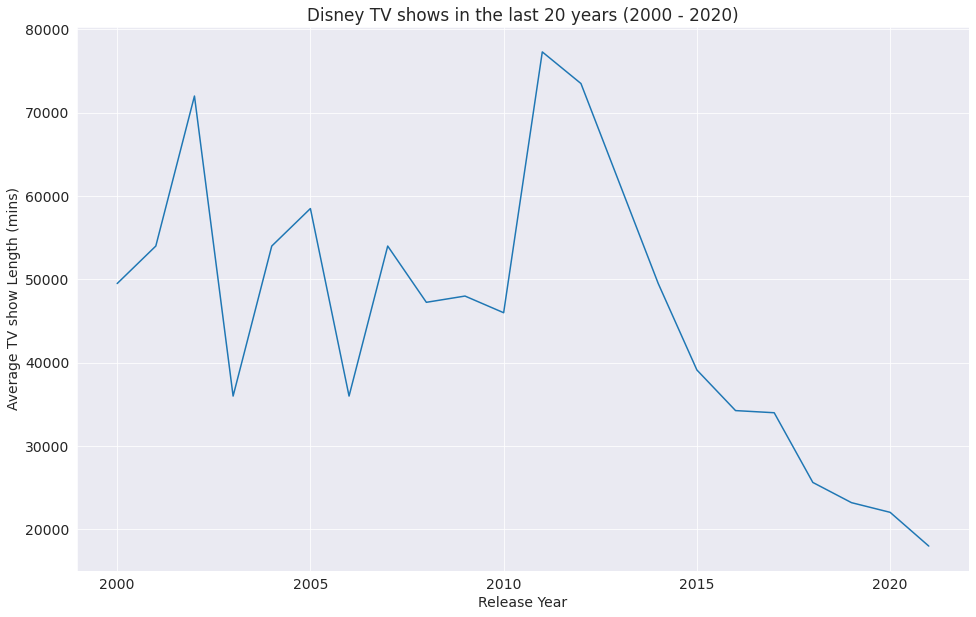

In [34]:
avg_tvshow_length_by_release_year = tvshow[['release_year','duration_min',]] \
                                    .groupby('release_year') \
                                    .mean()\
                                    .round() \
                                    .sort_values(by='release_year', ascending=True)
avg_tvshow_length_by_release_year.plot(figsize=(16,10), legend=False)
plt.xlabel('Release Year')
plt.ylabel('Average TV show Length (mins)')
plt.title('Disney TV shows in the last 20 years (2000 - 2020)');

**Exaplanation:** We can see from the plot how the average length of the TV shows in Disney+ changed during the years 2000-2020. The dataset wan't updated much after 2020 so we can't see a proper representation after 2020. Disney+ had its peak runtime of shows at 2011-12. After that the show runtime in average falled again.

**Q2-What are the top 10 longest Disney TV shows among the year 2000-2023? Find out which rating the majority of the shows had with a bar digram**

In [27]:
top_10_longest_tvshows = tvshow.sort_values(by='duration_min', ascending=False).head(10)
top_10_longest_tvshows[['title','rating','release_year', 'duration_min',]]

,title,rating,release_year,duration_min
115,The Incredible Dr. Pol,TV-14,2011,342000
106,Life Below Zero,TV-14,2012,288000
13,"Dr. Oakley, Yukon Vet",TV-PG,2013,180000
216,Wicked Tuna,TV-14,2016,180000
125,Dr. K's Exotic Animal ER,TV-14,2014,162000
557,Brain Games,TV-G,2011,144000
285,Car SOS,TV-PG,2012,144000
307,Wicked Tuna: Outer Banks,TV-14,2013,126000
179,When Sharks Attack,TV-14,2013,126000
618,Star Wars: The Clone Wars,TV-PG,2008,126000


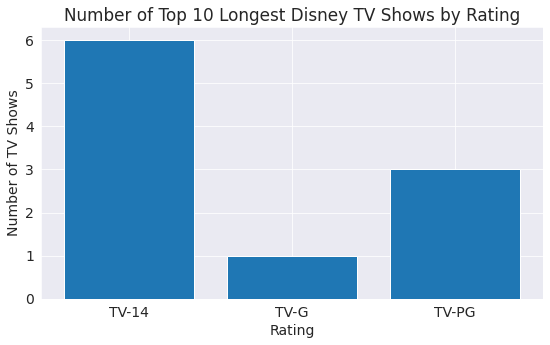

In [28]:
tvshows_by_rating = top_10_longest_tvshows.groupby('rating')['title'].count()

# Create a bar plot to visualize the results
plt.bar(tvshows_by_rating.index, tvshows_by_rating.values)
plt.xlabel('Rating')
plt.ylabel('Number of TV Shows')
plt.title('Number of Top 10 Longest Disney TV Shows by Rating')
plt.show()

**Exaplanation:** We found out the top 10 longest Disney channel tv shows by rating and saw from the plot that TV-14 had most of the longest tv shows after the year 2000.So, we can say that TV-14 has the most audience in this platform.

**Q3-What are the top 10 shortest Disney TV shows among the year 2000-2023? Find out which rating the majority of the shows had with a bar digram**

In [29]:
top_10_shortest_tvshows = tvshow.sort_values(by='duration_min').head(10)
top_10_shortest_tvshows[['title','rating','release_year', 'duration_min',]]

,title,rating,release_year,duration_min
4,The Beatles: Get Back,NaN,2021,18000
451,Destination World,TV-G,2018,18000
452,Fearless Adventures with Jack Randall,TV-PG,2018,18000
455,King Fishers,TV-PG,2013,18000
458,Muppets Now,TV-PG,2020,18000
460,What Sam Sees,TV-G,2018,18000
463,Rogue Trip,TV-PG,2020,18000
464,Wild Congo,TV-PG,2014,18000
465,Wild Sri Lanka,TV-PG,2016,18000
468,Disney Junior Music Lullabies,TV-Y,2018,18000


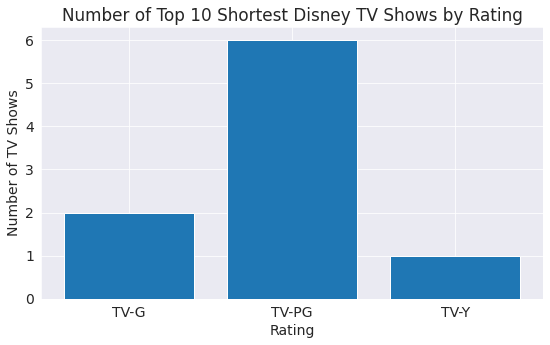

In [30]:
tvshows_by_rating_new = top_10_shortest_tvshows.groupby('rating')['title'].count()

# Create a bar plot to visualize the results
plt.bar(tvshows_by_rating_new.index, tvshows_by_rating_new.values)
plt.xlabel('Rating')
plt.ylabel('Number of TV Shows')
plt.title('Number of Top 10 Shortest Disney TV Shows by Rating')
plt.show()

**Exaplanation:** We found out the top 10 shortest Disney channel tv shows by rating and saw from the plot that TV-PG had most of the shortest tv shows after the year 2000. So, we can say that the TV-PG has less audience in this platform.

**Q4-Is there a correlation between the duration of a TV show and the number of cast members?** (use a histogram)

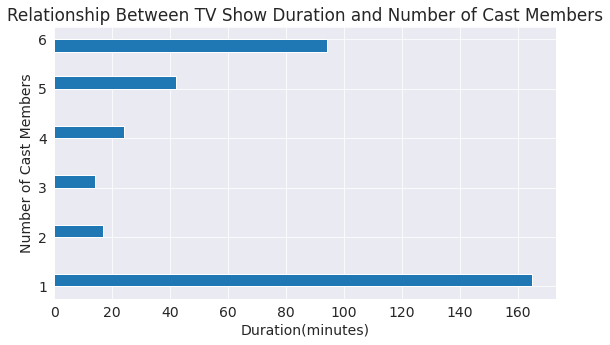

In [40]:
# Create a subset of the TV show data for only TV shows
tvshow_tv = tvshow[tvshow['type'] == 'TV Show']

# Replace NaN values in 'cast' column with an empty string
tvshow_tv['cast'] = tvshow_tv['cast'].fillna('')

# Split the cast column into individual actors and count them
tvshow_tv['num_cast'] = tvshow_tv['cast'].str.split(',').apply(len)

# Create a scatter plot of duration vs. num_cast
plt.hist(tvshow_tv['num_cast'], orientation='horizontal', bins=20)
plt.xlabel('Duration(minutes)')
plt.ylabel('Number of Cast Members')
plt.title('Relationship Between TV Show Duration and Number of Cast Members')
plt.show()

**Exaplanation:** We can find that the short length shows had more cast than the very large length shows. Or, it could also be an error of the dataset where they left out the cast members names as it was too long of a list. So, either there is an error of listing cast members of if this dataset is 100% correct, than this is the relationship between tv show duration and number of cast members. 

**Q5-Find out the Top 10 Cast Members with Most Appearances in Disney TV Shows (2000-2023)**

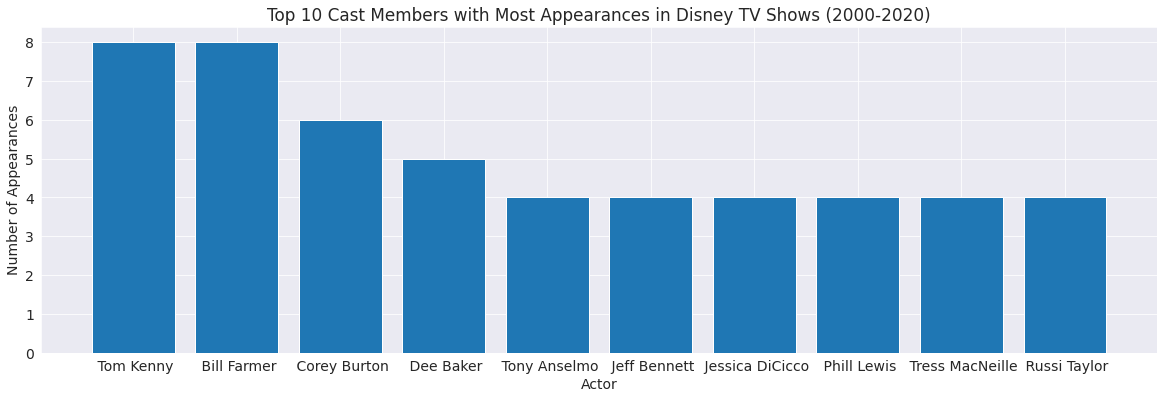

In [41]:
recent_tvshows = tvshow[(tvshow['type'] == 'TV Show') & (tvshow['release_year'] >= 2000)]

# Split the cast column into individual actors and create a new row for each actor
cast_members = recent_tvshows['cast'].str.split(',').explode()

# Count the number of appearances for each actor and select the top 10
top_cast = cast_members.value_counts().head(10)

# Create a bar plot to visualize the results
fig, ax = plt.subplots(figsize=(20, 6))
ax.bar(top_cast.index, top_cast.values)
ax.set_xlabel('Actor')
ax.set_ylabel('Number of Appearances')
ax.set_title('Top 10 Cast Members with Most Appearances in Disney TV Shows (2000-2020)')
plt.show()

 **Exaplanation:** Here, we can see the actors who appeared in most TV shows in Disney+ after the year 2000. The most appeared actor here is Tom Kenny and Bill Farmer who have 8 appearances in total. 2nd and 3rd are Corey Burton and Dee Baker who have 6 and 5 appearances. After that the other top 10 actors have the same number of appearances of 4.

In [42]:
import jovian

In [43]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "farihazaman-nishat/disney-plus-data-analysis-assignment" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/farihazaman-nishat/disney-plus-data-analysis-assignment


'https://jovian.com/farihazaman-nishat/disney-plus-data-analysis-assignment'

## Inferences and Conclusion

Through this assignment, a general overview can be seen of the Disney+ TV shows after the year 2000. The average runtime of shows, plots showing relation with one column to another, top 10 most appeared actors, top 10 shortest and longest tv shows and many more information could be found in this analysis.

I have gained practical experience on data analysis thanks to Jovian.ml. I got to learn about how to do data analysis from scratch and this course also developed my knowledge on python a lot as well. I am now very familiar with jupyter notebook and it will make my future data analysis projects easy.I am very grateful for this new platform I found and for their service through which I got to learn a lot.

In [30]:
import jovian

In [31]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "aakashns/zerotopandas-course-project-starter" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/aakashns/zerotopandas-course-project-starter


'https://jovian.ml/aakashns/zerotopandas-course-project-starter'

## References and Future Work
-As the demand of TV shows has been only getting larger, more analysis could be made using more questions relations of columns. 

-The graphs could be made clearer by setting different colors and using other different type plots.

-Machine learning algorithms can be used with the analyzed data to predict future information and TV show consumer behavior successfully. 

In [44]:
import jovian

In [45]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "farihazaman-nishat/disney-plus-data-analysis-assignment" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/farihazaman-nishat/disney-plus-data-analysis-assignment


'https://jovian.com/farihazaman-nishat/disney-plus-data-analysis-assignment'